# Notebook Setup and Basic Data Inspection

In [ ]:
from google.colab import drive

drive.mount('/content/drive') # Remember to add the folder (as a shortcut) to your drive before running this cell
%cd /content/drive/MyDrive/PROJECT_CS547_IE534

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1ebKvoK7afoaMA3BiVP8gBiRPCDUjeorO/PROJECT_CS547_IE534


In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Set random seeds
random.seed(42)
np.random.seed(42)

In [ ]:
# Load training data (with one-hot encoding and without)
training_with_onehot = pd.read_pickle('../Milestone_1/training_data_with_onehot.pkl').reset_index(drop=True)
training_without_onehot = pd.read_pickle('../Milestone_1/training_data_without_onehot.pkl').reset_index(drop=True)

# Target and features
TARGET = 'end_station_name'  # Target variable

In [ ]:
training_without_onehot.head()

,rideable_type,started_at,Month,Day_of_Week,Exact_start_Time,ended_at,duration,start_station_name,start_lat,start_lng,member_casual,Weather_PRCP,Weather_AVG_WIND,Weather_TMAX,Weather_TMIN,Weather_SNOW,end_station_name,end_lat,end_lng
0,classic_bike,2023-01-09 18:45:11.355,January,Monday,18:45:11.355000,2023-01-09 18:52:51.173,459.818,Broadway & W 56 St,40.765265,-73.981923,member,0.01,4.47,44.0,37.0,0.0,E 54 St & 1 Ave,40.756265,-73.964179
1,classic_bike,2023-01-24 21:59:02.412,January,Tuesday,21:59:02.412000,2023-01-24 22:01:46.344,163.932,Kingston Ave & Herkimer St,40.678907,-73.941428,member,0.23,NaN,NaN,NaN,0.0,MacDonough St & Marcy Ave,40.680780,-73.946130
2,classic_bike,2023-01-06 05:36:46.608,January,Friday,05:36:46.608000,2023-01-06 05:53:27.805,1001.197,6 Ave & Broome St,40.724310,-74.004730,member,0.34,0.89,57.0,57.0,0.0,Broadway & W 48 St,40.760177,-73.984868
3,classic_bike,2023-01-17 09:32:14.431,January,Tuesday,09:32:14.431000,2023-01-17 10:00:05.335,1670.904,E 39 St & 2 Ave,40.748033,-73.973828,member,0.00,3.13,47.0,35.0,0.0,W 17 St & 7 Ave,40.740564,-73.998526
4,classic_bike,2023-01-27 18:35:40.665,January,Friday,18:35:40.665000,2023-01-27 18:43:48.903,488.238,6 Ave & W 33 St,40.749013,-73.988484,casual,0.00,5.82,44.0,35.0,0.0,6 Ave & W 45 St,40.756951,-73.982631


In [ ]:
training_without_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       120000 non-null  object        
 1   started_at          120000 non-null  datetime64[ns]
 2   Month               120000 non-null  object        
 3   Day_of_Week         120000 non-null  object        
 4   Exact_start_Time    120000 non-null  object        
 5   ended_at            120000 non-null  datetime64[ns]
 6   duration            120000 non-null  float64       
 7   start_station_name  120000 non-null  object        
 8   start_lat           120000 non-null  float64       
 9   start_lng           120000 non-null  float64       
 10  member_casual       120000 non-null  object        
 11  Weather_PRCP        119091 non-null  float64       
 12  Weather_AVG_WIND    62658 non-null   float64       
 13  Weather_TMAX        88080 non

In [ ]:
training_with_onehot.head()

,started_at,Exact_start_Time,ended_at,duration,start_lat,start_lng,Weather_PRCP,Weather_AVG_WIND,Weather_TMAX,Weather_TMIN,...,start_station_Wyckoff Av & Jefferson St,start_station_Wyckoff Av & Stanhope St,start_station_Wyckoff Ave & Cooper Ave,start_station_Wyckoff Ave & Gates Ave,start_station_Wyckoff Ave & Jefferson St,start_station_Wyckoff Ave & Stanhope St,start_station_Wyckoff St & 3 Ave,start_station_Wythe Ave & Metropolitan Ave,start_station_Wythe Ave & N 13 St,start_station_Yankee Ferry Terminal
0,2023-01-09 18:45:11.355,18:45:11.355000,2023-01-09 18:52:51.173,459.818,40.765265,-73.981923,0.01,4.47,44.0,37.0,...,False,False,False,False,False,False,False,False,False,False
1,2023-01-24 21:59:02.412,21:59:02.412000,2023-01-24 22:01:46.344,163.932,40.678907,-73.941428,0.23,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2023-01-06 05:36:46.608,05:36:46.608000,2023-01-06 05:53:27.805,1001.197,40.724310,-74.004730,0.34,0.89,57.0,57.0,...,False,False,False,False,False,False,False,False,False,False
3,2023-01-17 09:32:14.431,09:32:14.431000,2023-01-17 10:00:05.335,1670.904,40.748033,-73.973828,0.00,3.13,47.0,35.0,...,False,False,False,False,False,False,False,False,False,False
4,2023-01-27 18:35:40.665,18:35:40.665000,2023-01-27 18:43:48.903,488.238,40.749013,-73.988484,0.00,5.82,44.0,35.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
training_with_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Columns: 2160 entries, started_at to start_station_Yankee Ferry Terminal
dtypes: bool(2146), datetime64[ns](2), float64(10), object(2)
memory usage: 258.4+ MB


# Handle Missing Data

Here, we use the non one-hot dataset and get the numerical feature columns. We fill missing numerical values using the median. And for the one-hot dataset, we fill missing one-hot encoding values with 0.

In [ ]:
# For the non-one-hot dataset
# Fill missing numerical values with median
numerical_features = training_without_onehot.select_dtypes(include=['float64', 'int64']).columns
training_without_onehot[numerical_features] = training_without_onehot[numerical_features].fillna(training_without_onehot[numerical_features].median())

# For the one-hot-encoded dataset
training_with_onehot = training_with_onehot.fillna(0)  # Fill missing one-hot encoding values with 0

In [ ]:
training_without_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       120000 non-null  object        
 1   started_at          120000 non-null  datetime64[ns]
 2   Month               120000 non-null  object        
 3   Day_of_Week         120000 non-null  object        
 4   Exact_start_Time    120000 non-null  object        
 5   ended_at            120000 non-null  datetime64[ns]
 6   duration            120000 non-null  float64       
 7   start_station_name  120000 non-null  object        
 8   start_lat           120000 non-null  float64       
 9   start_lng           120000 non-null  float64       
 10  member_casual       120000 non-null  object        
 11  Weather_PRCP        120000 non-null  float64       
 12  Weather_AVG_WIND    120000 non-null  float64       
 13  Weather_TMAX        120000 no

# Handle Class Imbalance

In [ ]:
# Analyze the distribution of the target variable
print("Analysis of Target Variable: End Station Name")
display(training_without_onehot[TARGET].value_counts().head(10))  # Display top 10 most frequent stations
print("\nNumber of Unique End Stations:", training_without_onehot[TARGET].nunique())

Analysis of Target Variable: End Station Name


,count
end_station_name,
W 24 St & 7 Ave,762
E 1 St & 1 Ave,564
Cleveland Pl & Spring St,557
W 31 St & 7 Ave,527
North Moore St & Greenwich St,487
6 Ave & W 34 St,484
E 77 St & 1 Ave,481
E 48 St & 5 Ave,471
Washington St & Gansevoort St,459



Number of Unique End Stations: 2100


In [ ]:
# Distribution of the target variable
end_station_counts = training_without_onehot['end_station_name'].value_counts()

# Calculate imbalance
print("Top 10 End Stations Account for:")
print(f"{end_station_counts.head(10).sum() / end_station_counts.sum() * 100:.2f}% of total trips.")

Top 10 End Stations Account for:
4.37% of total trips.


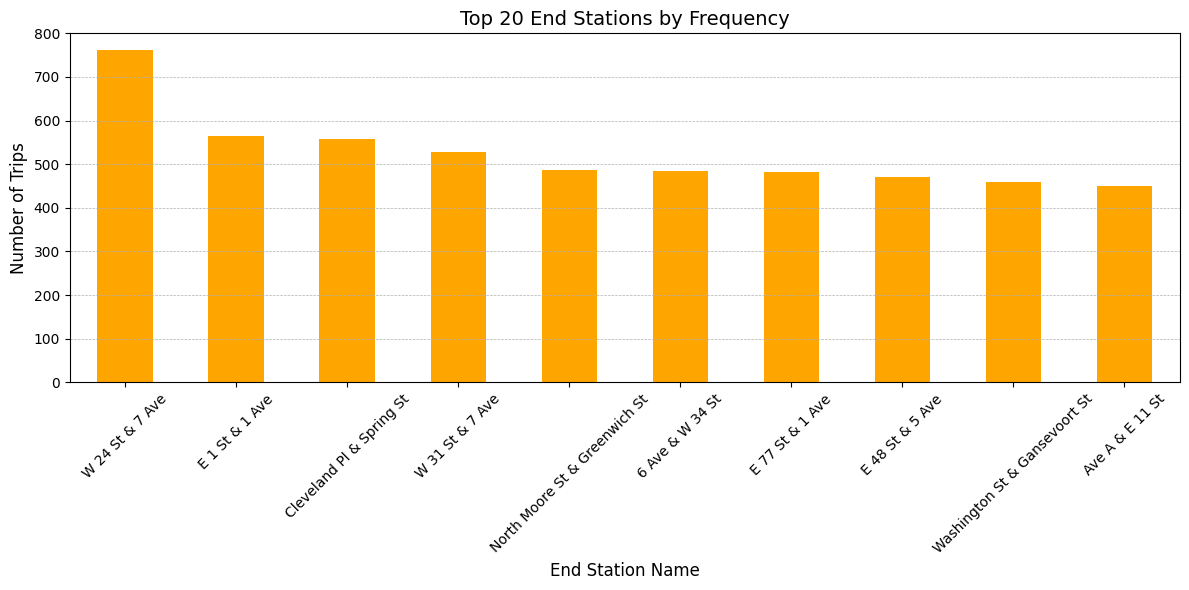

In [ ]:
# Plot the distribution of target variable
plt.figure(figsize=(12, 6))
end_station_counts.head(10).plot(kind='bar', color='orange')
plt.title("Top 20 End Stations by Frequency", fontsize=14)
plt.xlabel("End Station Name", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

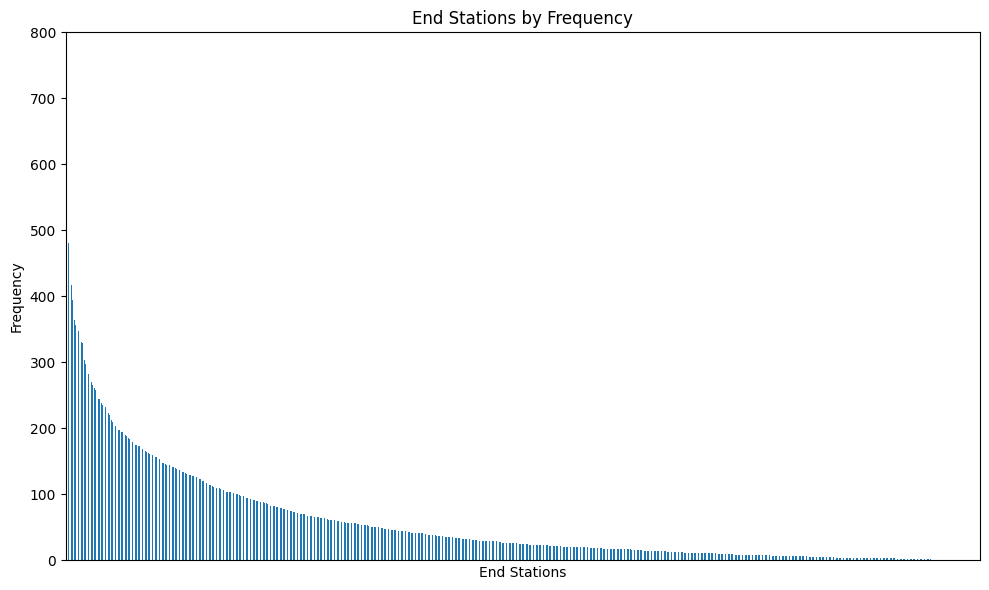

In [ ]:
# Visualize the frequency of end stations
plt.figure(figsize=(10, 6))
training_without_onehot[TARGET].value_counts().plot(kind='bar')
plt.title("End Stations by Frequency")
plt.xlabel("End Stations")
plt.ylabel("Frequency")
plt.xticks([])
plt.tight_layout()
plt.show()

We have a large class imbalance and right skew that need to be handled.

In [ ]:
# Calculate average count of end stations
average_count = end_station_counts.mean()
print("Average Count of End Stations:", average_count)

# Calculate median count of end stations
median_count = end_station_counts.median()
print("Median Count of End Stations:", median_count)

Average Count of End Stations: 57.142857142857146
Median Count of End Stations: 25.0


In [ ]:
# Inference based on skew
def get_skew_inference(skew_end_station):
    if skew_end_station > 1:
        print("Inference: The distribution of end station counts is highly skewed to the right.")
        print("This indicates that a few end stations have a very large number of trips, while most stations have a relatively small number of trips.")
    elif skew_end_station > 0 and skew_end_station <= 1:
        print("Inference: The distribution of end station counts is moderately skewed to the right.")
        print("This indicates that a few end stations have a larger number of trips compared to most stations.")
    elif skew_end_station < 0 and skew_end_station >= -1:
        print("Inference: The distribution of end station counts is moderately skewed to the left.")
        print("This indicates that a few end stations have a smaller number of trips compared to most stations.")
    elif skew_end_station < -1:
        print("Inference: The distribution of end station counts is highly skewed to the left.")
        print("This indicates that a few end stations have a very small number of trips, while most stations have a relatively large number of trips.")
    else:
        print("Inference: The distribution of end station counts is approximately symmetric.")
        print("This indicates that the number of trips to different stations is relatively balanced.")

In [ ]:
# Calculate skew for end_station_counts
skew_end_station = end_station_counts.skew()
print(f"Skewness of end_station_counts: {skew_end_station}")
get_skew_inference(skew_end_station)

Skewness of end_station_counts: 2.6944202188692117
Inference: The distribution of end station counts is highly skewed to the right.
This indicates that a few end stations have a very large number of trips, while most stations have a relatively small number of trips.


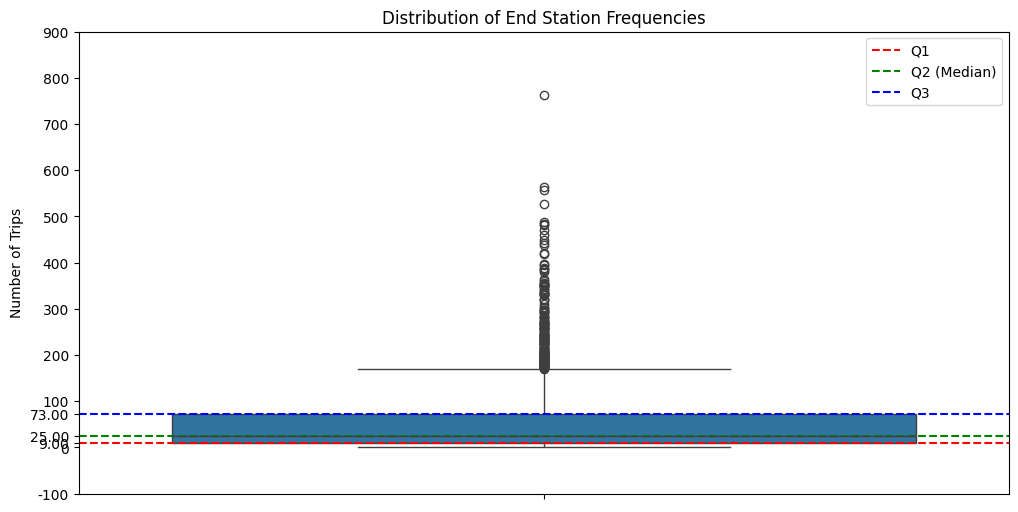

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming end_station_counts is your pandas Series

# Create a box plot for end station frequencies
plt.figure(figsize=(12, 6))
sns.boxplot(y=end_station_counts)
plt.title("Distribution of End Station Frequencies")
plt.ylabel("Number of Trips")

# Calculate quartiles
q1 = end_station_counts.quantile(0.25)
q2 = end_station_counts.quantile(0.50)  # Median
q3 = end_station_counts.quantile(0.75)

# Add markers for Q1, Q2, and Q3
plt.axhline(q1, color='red', linestyle='--', label='Q1')
plt.axhline(q2, color='green', linestyle='--', label='Q2 (Median)')
plt.axhline(q3, color='blue', linestyle='--', label='Q3')

# Get current y-axis ticks
current_yticks = plt.yticks()[0]

# Add quartile values to y-axis ticks
new_yticks = np.sort(np.concatenate([current_yticks, [q1, q2, q3]]))

# Set new y-axis ticks and labels
plt.yticks(new_yticks, [f'{y:.2f}' if y in [q1, q2, q3] else str(int(y)) for y in new_yticks])

plt.legend()  # Keep the legend for the horizontal lines
plt.show()

## Using Class Weights

One way to handle class imbalance is to compute and class weights to each target label. The code below calculates weights for each unique end station to address class imbalance in the dataset. This is done using compute_class_weight with the 'balanced' strategy, which assigns higher weights to less frequent stations. These weights can then be applied during model training to improve performance by giving under-represented stations more importance.

In [ ]:
# Compute class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(training_without_onehot[TARGET]),
    y=training_without_onehot[TARGET]
)
class_weights_dict = dict(enumerate(class_weights))

print("Computed Class Weights:", class_weights_dict)

Computed Class Weights: {0: 0.24630541871921183, 1: 0.5194805194805194, 2: 0.3686635944700461, 3: 0.30721966205837176, 4: 0.1892147587511826, 5: 0.7326007326007326, 6: 0.8048289738430584, 7: 0.145032632342277, 8: 0.303951367781155, 9: 0.5657708628005658, 10: 0.4429678848283499, 11: 0.6279434850863422, 12: 0.60790273556231, 13: 0.25396825396825395, 14: 19.047619047619047, 15: 19.047619047619047, 16: 19.047619047619047, 17: 7.142857142857143, 18: 0.25510204081632654, 19: 2.5974025974025974, 20: 0.6884681583476764, 21: 9.523809523809524, 22: 1.680672268907563, 23: 57.142857142857146, 24: 57.142857142857146, 25: 57.142857142857146, 26: 28.571428571428573, 27: 11.428571428571429, 28: 28.571428571428573, 29: 9.523809523809524, 30: 1.7857142857142858, 31: 0.1292824822236587, 32: 0.19704433497536947, 33: 0.5494505494505495, 34: 4.761904761904762, 35: 19.047619047619047, 36: 57.142857142857146, 37: 57.142857142857146, 38: 19.047619047619047, 39: 28.571428571428573, 40: 57.142857142857146, 41: 1

# Baseline Model: Logistic Regression (using class weights)

We use linear logistic regression model since we have a categorical target label.

## Preparing Train and Test Data

In [ ]:
df = training_without_onehot.copy()

class_counts = df[TARGET].value_counts()
median_count = class_counts.median()
average_count = class_counts.mean()

print("Median Count of End Stations:", median_count)
print("Average Count of End Stations:", average_count)

filter_threshold = average_count
valid_classes = class_counts[class_counts >= filter_threshold].index
df = df[df[TARGET].isin(valid_classes)]

Median Count of End Stations: 25.0
Average Count of End Stations: 57.142857142857146


In [ ]:
# Define Features (X) and Target (y)
X = df.drop(columns=[TARGET])  # Features
y = df[TARGET]  # Target

# Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74846 entries, 118561 to 113390
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rideable_type       74846 non-null  object        
 1   started_at          74846 non-null  datetime64[ns]
 2   Month               74846 non-null  object        
 3   Day_of_Week         74846 non-null  object        
 4   Exact_start_Time    74846 non-null  object        
 5   ended_at            74846 non-null  datetime64[ns]
 6   duration            74846 non-null  float64       
 7   start_station_name  74846 non-null  object        
 8   start_lat           74846 non-null  float64       
 9   start_lng           74846 non-null  float64       
 10  member_casual       74846 non-null  object        
 11  Weather_PRCP        74846 non-null  float64       
 12  Weather_AVG_WIND    74846 non-null  float64       
 13  Weather_TMAX        74846 non-null  float64  

In [ ]:
X_train['Exact_start_Time']

,Exact_start_Time
118561,09:40:33.016000
39308,21:58:21.481000
46606,23:26:21.164000
64323,09:25:01.764000
50683,16:03:35.358000
...,...
37202,11:31:38.079000
13189,17:48:29.191000
94133,21:59:47.067000
53117,08:22:32.699000


In [ ]:
print(X_train.loc[248,'Exact_start_Time'])

20:28:05.216000


In [ ]:
formats = X_train['Exact_start_Time'].apply(type).unique()
formats

array([<class 'datetime.time'>], dtype=object)

In [ ]:
def convert_to_datetime(time_str):
    try:
        return pd.to_datetime(time_str, format='%H:%M:%S.%f')  # Try first format
    except ValueError:
        try:
            return pd.to_datetime(time_str, format='%H:%M:%S')  # Try second format
        except ValueError:
            # Handle other formats or errors here
            return pd.NaT

for d in [X_train, X_test]:
    d['Exact_start_Time'] = d['Exact_start_Time'].apply(convert_to_datetime)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74846 entries, 118561 to 113390
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rideable_type       74846 non-null  object        
 1   started_at          74846 non-null  datetime64[ns]
 2   Month               74846 non-null  object        
 3   Day_of_Week         74846 non-null  object        
 4   Exact_start_Time    74846 non-null  datetime64[ns]
 5   ended_at            74846 non-null  datetime64[ns]
 6   duration            74846 non-null  float64       
 7   start_station_name  74846 non-null  object        
 8   start_lat           74846 non-null  float64       
 9   start_lng           74846 non-null  float64       
 10  member_casual       74846 non-null  object        
 11  Weather_PRCP        74846 non-null  float64       
 12  Weather_AVG_WIND    74846 non-null  float64       
 13  Weather_TMAX        74846 non-null  float64  

In [ ]:
X_train['Exact_start_Time'][0]

Timestamp('1900-01-01 18:45:11.355000')

In [ ]:
# Convert 'started_at', 'ended_at', and 'Exact_start_Time' to numerical attributes (Unix timestamps)
for d in [X_train, X_test]:
    d['started_at'] = pd.to_numeric(d['started_at'])  # Directly convert to Unix timestamp
    d['ended_at'] = pd.to_numeric(d['ended_at'])    # Directly convert to Unix timestamp

    # Convert Timestamp objects to Unix timestamps (in seconds) and store as integers
    d['Exact_start_Time'] = d['Exact_start_Time'].apply(lambda x: int(x.timestamp()))

In [ ]:
X_train['start_station_name'].unique()

array(['E 14 St & 1 Ave', 'E 118 St & Madison Ave', 'W 56 St & 10 Ave',
       ..., 'Van Sinderen Ave & Atlantic Ave',
       'Tilden Ave & Nostrand Ave', 'MacDougal St & Rockaway Ave'],
      dtype=object)

In [ ]:
for column in X_train.select_dtypes(include=['object']).columns:
  print(f"Column: {column}")
  print(f"Number of Unique Values: {X_train[column].nunique()}")
  print("-" * 20)

Column: rideable_type
Number of Unique Values: 2
--------------------
Column: Month
Number of Unique Values: 12
--------------------
Column: Day_of_Week
Number of Unique Values: 7
--------------------
Column: start_station_name
Number of Unique Values: 1780
--------------------
Column: member_casual
Number of Unique Values: 2
--------------------


In [ ]:
# Frequency Encoding for 'start_station_name'
start_station_frequencies = X_train['start_station_name'].value_counts(normalize=True)
X_train['start_station_name_freq'] = X_train['start_station_name'].map(start_station_frequencies)
X_test['start_station_name_freq'] = X_test['start_station_name'].map(start_station_frequencies)

In [ ]:
X_train[X_train['start_station_name_freq'].isna()]

,rideable_type,started_at,Month,Day_of_Week,Exact_start_Time,ended_at,duration,start_station_name,start_lat,start_lng,member_casual,Weather_PRCP,Weather_AVG_WIND,Weather_TMAX,Weather_TMIN,Weather_SNOW,end_lat,end_lng,start_station_name_freq


In [ ]:
len(X_test[X_test['start_station_name_freq'].isna()])

47

In [ ]:
X_test['start_station_name_freq'] = X_test['start_station_name_freq'].fillna(start_station_frequencies.median())  # Handle unseen stations in test set

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74846 entries, 118561 to 113390
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rideable_type            74846 non-null  object 
 1   started_at               74846 non-null  int64  
 2   Month                    74846 non-null  object 
 3   Day_of_Week              74846 non-null  object 
 4   Exact_start_Time         74846 non-null  int64  
 5   ended_at                 74846 non-null  int64  
 6   duration                 74846 non-null  float64
 7   start_station_name       74846 non-null  object 
 8   start_lat                74846 non-null  float64
 9   start_lng                74846 non-null  float64
 10  member_casual            74846 non-null  object 
 11  Weather_PRCP             74846 non-null  float64
 12  Weather_AVG_WIND         74846 non-null  float64
 13  Weather_TMAX             74846 non-null  float64
 14  Weather_TMIN         

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18712 entries, 50840 to 43441
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rideable_type            18712 non-null  object 
 1   started_at               18712 non-null  int64  
 2   Month                    18712 non-null  object 
 3   Day_of_Week              18712 non-null  object 
 4   Exact_start_Time         18712 non-null  int64  
 5   ended_at                 18712 non-null  int64  
 6   duration                 18712 non-null  float64
 7   start_station_name       18712 non-null  object 
 8   start_lat                18712 non-null  float64
 9   start_lng                18712 non-null  float64
 10  member_casual            18712 non-null  object 
 11  Weather_PRCP             18712 non-null  float64
 12  Weather_AVG_WIND         18712 non-null  float64
 13  Weather_TMAX             18712 non-null  float64
 14  Weather_TMIN           

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select object columns excluding 'start_station_name'
object_cols = X_train.select_dtypes(include=['object']).columns
object_cols = [col for col in object_cols if col != 'start_station_name']

# Create OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit the encoder on training data
encoder.fit(X_train[object_cols])

# Transform training and test data
encoded_train = encoder.transform(X_train[object_cols])
encoded_test = encoder.transform(X_test[object_cols])

# Create DataFrames from encoded data
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(object_cols), index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(object_cols), index=X_test.index)

# Concatenate encoded features with original DataFrames
X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

# Display mapping of original to encoded column names
print("Mapping of original to encoded column names:")
for original_col in object_cols:
    encoded_cols = [col for col in encoded_train_df.columns if col.startswith(original_col)]
    print(f"{original_col} -> {encoded_cols}")

# Drop original object columns
X_train.drop(columns=object_cols, inplace=True)
X_test.drop(columns=object_cols, inplace=True)

Mapping of original to encoded column names:
rideable_type -> ['rideable_type_classic_bike', 'rideable_type_electric_bike']
Month -> ['Month_April', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September']
Day_of_Week -> ['Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday']
member_casual -> ['member_casual_casual', 'member_casual_member']


In [ ]:
# Drop original start station name column
X_train.drop(columns=['start_station_name'], inplace=True)
X_test.drop(columns=['start_station_name'], inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74846 entries, 118561 to 113390
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   started_at                   74846 non-null  int64  
 1   Exact_start_Time             74846 non-null  int64  
 2   ended_at                     74846 non-null  int64  
 3   duration                     74846 non-null  float64
 4   start_lat                    74846 non-null  float64
 5   start_lng                    74846 non-null  float64
 6   Weather_PRCP                 74846 non-null  float64
 7   Weather_AVG_WIND             74846 non-null  float64
 8   Weather_TMAX                 74846 non-null  float64
 9   Weather_TMIN                 74846 non-null  float64
 10  Weather_SNOW                 74846 non-null  float64
 11  end_lat                      74846 non-null  float64
 12  end_lng                      74846 non-null  float64
 13  start_station_n

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18712 entries, 50840 to 43441
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   started_at                   18712 non-null  int64  
 1   Exact_start_Time             18712 non-null  int64  
 2   ended_at                     18712 non-null  int64  
 3   duration                     18712 non-null  float64
 4   start_lat                    18712 non-null  float64
 5   start_lng                    18712 non-null  float64
 6   Weather_PRCP                 18712 non-null  float64
 7   Weather_AVG_WIND             18712 non-null  float64
 8   Weather_TMAX                 18712 non-null  float64
 9   Weather_TMIN                 18712 non-null  float64
 10  Weather_SNOW                 18712 non-null  float64
 11  end_lat                      18712 non-null  float64
 12  end_lng                      18712 non-null  float64
 13  start_station_nam

In [ ]:
# Compute new_class_weights using y_train (after train-test split)
new_class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),  # Use y_train here
    y=y_train                 # Use y_train here
)

# Create a dictionary mapping class labels to their weights
new_class_weights_dict = dict(zip(np.unique(y_train), new_class_weights))

print("New Class Weights:", new_class_weights_dict)

New Class Weights: {'1 Ave & E 110 St': 0.6267879275114728, '1 Ave & E 16 St': 1.3248017558765222, '1 Ave & E 18 St': 0.9401818912672093, '1 Ave & E 30 St': 0.7824332517928454, '1 Ave & E 39 St': 0.4817460930460081, '1 Ave & E 44 St': 1.8803637825344186, '1 Ave & E 6 St': 2.0453079739848063, '1 Ave & E 62 St': 0.3701033476734411, '1 Ave & E 68 St': 0.7772170301142264, '1 Ave & E 78 St': 1.4392907965078265, '1 Ave & E 94 St': 1.1318694613313975, '1 Pl & Clinton St': 1.5970212947552598, '1 St & 6 Ave': 1.5544340602284528, '10 Ave & W 14 St': 0.647680858428522, '10 Ave & W 28 St': 0.6512991872465584, '10 St & 4 Ave': 1.7664023411686962, '11 Ave & W 27 St': 0.329329250048401, '11 Ave & W 41 St': 0.5025110108497153, '11 Ave & W 59 St': 1.404609090567879, '12 Ave & W 125 St': 0.8700190635607011, '12 Ave & W 40 St': 0.7521455130137674, '14 St & 7 Ave': 2.331651090342679, '17 St & 5 Ave': 2.010044043398861, '2 Ave & E 125 St': 1.5339809804886047, '2 Ave & E 29 St': 0.9555947091568358, '2 Ave &

In [ ]:
# Range of New Class Weights
min_weight = min(new_class_weights_dict.values())
max_weight = max(new_class_weights_dict.values())

print(f"Minimum Weight: {min_weight}")
print(f"Maximum Weight: {max_weight}")

Minimum Weight: 0.19111894183136713
Maximum Weight: 2.4804798833432757


## Simple Baseline Model (with default params)

In [ ]:
# Apply standard scaling to all numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [ ]:
# Train Logistic Regression with class weights
baseline_log_reg_model_using_class_weights = LogisticRegression(
    class_weight=new_class_weights_dict,
    random_state=42,
    verbose=1,
    max_iter=3000
)

In [ ]:
import time

start_time = time.time()

# Fit on train set
baseline_log_reg_model_using_class_weights.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={'1 Ave & E 110 St': 0.6267879275114728,
                                 '1 Ave & E 16 St': 1.3248017558765222,
                                 '1 Ave & E 18 St': 0.9401818912672093,
                                 '1 Ave & E 30 St': 0.7824332517928454,
                                 '1 Ave & E 39 St': 0.4817460930460081,
                                 '1 Ave & E 44 St': 1.8803637825344186,
                                 '1 Ave & E 6 St': 2.0453079739848063,
                                 '1 Ave & E 62 St': 0.3701033476734411,
                                 '1 Ave & E 68 St': 0.7772170301142264,
                                 '1 Ave & E 78 St': 1.43929079650782...
                                 '12 Ave & W 40 St': 0.7521455130137674,
                                 '14 St & 7 Ave': 2.331651090342679,
                                 '17 St & 5 Ave': 2.010044043398861,
                                 '2 Ave & E 125 St': 1.5339809804886047,
                                 '2 Ave & E 29 St': 0.9555947091568358,
                                 '2 Ave & E 31 St': 0.4399341679891847,
                                 '2 Ave & E 96 St': 0.6267879275114728,
                                 '21 St & Hoyt Ave S': 1.1776015607791308,
                                 '3 Ave & E 112 St': 1.4217384697211457,
                                 '3 Ave & E 62 St': 0.5978592539340203, ...},
                   max_iter=3000, random_state=42, verbose=1)

In [ ]:
training_time = round((time.time() - start_time)/60, 2)
print(f"Training time: {training_time} minutes")

Training time: 5.11 minutes


In [ ]:
# Get a list of all parameters except 'class_weight'
params_except_class_weight = [
    param for param in baseline_log_reg_model_using_class_weights.get_params()
    if param != 'class_weight'
]

# Print the key, value of parameters
for param in params_except_class_weight:
    print(f"{param}: {baseline_log_reg_model_using_class_weights.get_params()[param]}")

C: 1.0
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 3000
multi_class: deprecated
n_jobs: None
penalty: l2
random_state: 42
solver: lbfgs
tol: 0.0001
verbose: 1
warm_start: False


In [ ]:
import pickle

# Save the model to google drive folder
with open('baseline_log_reg_model_using_class_weights.pkl', 'wb') as file:
    pickle.dump(baseline_log_reg_model_using_class_weights, file)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions on the test set
y_pred_with_weights = baseline_log_reg_model_using_class_weights.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression with Class Weights:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_with_weights):.4f}")

# Balanced accuracy is more informative for imbalanced data
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_with_weights):.4f}")

# Precision and recall with macro-average for fair evaluation across all classes
print(f"Precision (Macro): {precision_score(y_test, y_pred_with_weights, average='macro', zero_division=0):.4f}")
print(f"Recall (Macro): {recall_score(y_test, y_pred_with_weights, average='macro'):.4f}")

# F1-score as it balances precision and recall, using macro-average
print(f"F1 Score (Macro): {f1_score(y_test, y_pred_with_weights, average='macro'):.4f}")

Logistic Regression with Class Weights:
Accuracy: 0.1925
Balanced Accuracy: 0.2368
Precision (Macro): 0.2250
Recall (Macro): 0.2368
F1 Score (Macro): 0.1912


## Baseline Logistic Regression Using GPU (PyTorch)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts to integers
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Apply standard scaling to all numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Convert scaled data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

# Convert to PyTorch tensors
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

In [ ]:
print("Device:", device)

Device: cpu


In [ ]:
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return the number of GPUs (e.g., 1)

if torch.cuda.is_available():
    print(torch.cuda.current_device())  # Should return the active GPU index
    print(torch.cuda.get_device_name(0))  # Should return the GPU model name

False
0


In [ ]:
# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # Apply log-softmax for numerical stability
        return torch.log_softmax(self.linear(x), dim=1)

In [ ]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

In [ ]:
# Initialize the model
input_dim = X_train.shape[1]
output_dim = len(y_train.unique())  # Number of classes
model = LogisticRegressionModel(input_dim, output_dim).to(device)

# Apply weight initialization
model.apply(initialize_weights)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=torch.tensor(new_class_weights, dtype=torch.float32).to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training hyperparameters
num_epochs = 3000

In [ ]:
# Initialize lists to store losses and epochs
epoch_losses = []
epoch_numbers = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Compute average loss for the epoch
    avg_loss = epoch_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    epoch_numbers.append(epoch + 1)

    # Print loss per epoch
    if epoch + 1 == 1 or (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/3000], Loss: 5.4243
Epoch [100/3000], Loss: 2.8577
Epoch [200/3000], Loss: 2.5392
Epoch [300/3000], Loss: 2.3531
Epoch [400/3000], Loss: 2.2217
Epoch [500/3000], Loss: 2.1215
Epoch [600/3000], Loss: 2.0384
Epoch [700/3000], Loss: 1.9689
Epoch [800/3000], Loss: 1.9098
Epoch [900/3000], Loss: 1.8571
Epoch [1000/3000], Loss: 1.8083
Epoch [1100/3000], Loss: 1.7669
Epoch [1200/3000], Loss: 1.7277
Epoch [1300/3000], Loss: 1.6927
Epoch [1400/3000], Loss: 1.6590
Epoch [1500/3000], Loss: 1.6308
Epoch [1600/3000], Loss: 1.6018
Epoch [1700/3000], Loss: 1.5754
Epoch [1800/3000], Loss: 1.5501
Epoch [1900/3000], Loss: 1.5269
Epoch [2000/3000], Loss: 1.5053
Epoch [2100/3000], Loss: 1.4839
Epoch [2200/3000], Loss: 1.4651
Epoch [2300/3000], Loss: 1.4443
Epoch [2400/3000], Loss: 1.4277
Epoch [2500/3000], Loss: 1.4088
Epoch [2600/3000], Loss: 1.3923
Epoch [2700/3000], Loss: 1.3790
Epoch [2800/3000], Loss: 1.3606
Epoch [2900/3000], Loss: 1.3468
Epoch [3000/3000], Loss: 1.3309


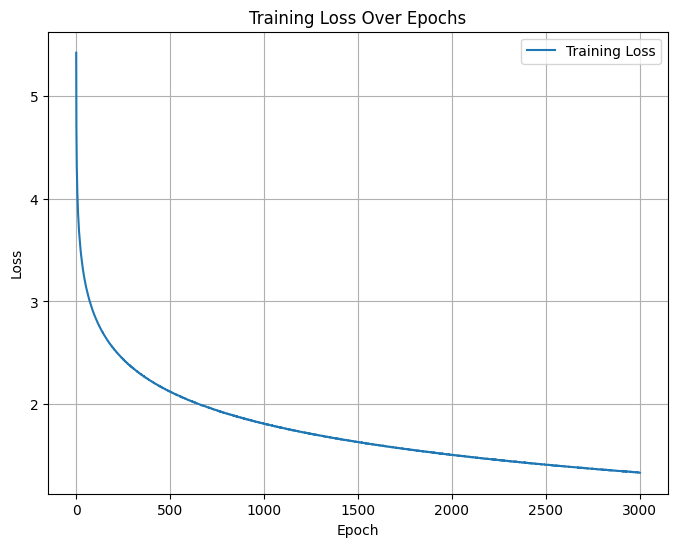

In [ ]:
# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(epoch_numbers, epoch_losses, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Save Model
torch.save(model.state_dict(), 'baseline_pytorch_log_reg_model_weights.pth')

In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
linear.weight 	 torch.Size([642, 37])
linear.bias 	 torch.Size([642])
Optimizer's state_dict:
state 	 {0: {'step': tensor(441000.), 'exp_avg': tensor([[ 6.3378e-05, -1.9511e-04,  6.3382e-05,  ..., -6.3772e-05,
         -7.2992e-05,  7.2992e-05],
        [ 3.0700e-04,  5.5732e-05,  3.0705e-04,  ...,  1.9865e-05,
          1.9296e-05, -1.9296e-05],
        [ 6.5371e-04, -7.5757e-04,  6.5368e-04,  ...,  7.4323e-04,
         -1.0260e-04,  1.0260e-04],
        ...,
        [-5.2037e-05, -5.6407e-05, -5.2038e-05,  ..., -1.7763e-05,
          6.1999e-05, -6.1999e-05],
        [-3.0043e-04, -5.5722e-05, -3.0042e-04,  ...,  1.3739e-04,
         -1.8476e-04,  1.8476e-04],
        [-6.6791e-05,  2.2631e-04, -6.6774e-05,  ...,  3.9280e-04,
          9.9393e-04, -9.9393e-04]]), 'exp_avg_sq': tensor([[1.1786e-06, 1.3415e-06, 1.1787e-06,  ..., 1.3192e-06, 1.4222e-06,
         1.4222e-06],
        [2.7080e-06, 2.9979e-06, 2.7081e-06,  ..., 3.0198e-06, 1.5968e-06,
         1.5968e-0

In [ ]:
# Evaluate the model on the test set
model.eval()
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred_list.extend(predicted.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

# Convert predictions and true labels to numpy arrays
y_pred = torch.tensor(y_pred_list).cpu().numpy()
y_true = torch.tensor(y_true_list).cpu().numpy()

In [ ]:
# Evaluate metrics
print("PyTorch Logistic Regression Model:")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):.4f}") # Balanced accuracy is more informative for imbalanced data
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (Macro): {precision_score(y_true, y_pred, average='macro', zero_division=0):.4f}")
print(f"Recall (Macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 Score (Macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

PyTorch Logistic Regression Model:
Balanced Accuracy: 0.5641
Accuracy: 0.5376
Precision (Macro): 0.5534
Recall (Macro): 0.5641
F1 Score (Macro): 0.5298


In [ ]:
# Install required library
!pip install gTTS pydub

# Generate and play the sound
from gtts import gTTS
from IPython.display import Audio

# Generate audio
tts = gTTS("Execution Complete", lang='en', slow=True)
tts.save("execution_complete.mp3")

# Play audio
Audio("execution_complete.mp3", autoplay=True)